In [56]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [57]:
## Read the CSV File Using Pandas read_csv function
df = pd.read_csv('/content/classify_nc_mci.csv')

# print the concise summery of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3807 entries, 0 to 3806
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   HippoL      3806 non-null   float64
 1   HippoR      3806 non-null   float64
 2   HippoTotal  3806 non-null   float64
 3   Group       3807 non-null   object 
dtypes: float64(3), object(1)
memory usage: 119.1+ KB


In [58]:
print("Tota Rows and Columns (Rows,Columns) : ",df.shape)
#print first five rows of the dataset
df.head(5)

Tota Rows and Columns (Rows,Columns) :  (3807, 4)


,HippoL,HippoR,HippoTotal,Group
0,2352.466422,2342.110049,4694.576471,MCI
1,2760.679555,3043.756658,5804.436213,MCI
2,1865.737054,1852.453281,3718.190335,MCI
3,701.987929,958.252574,1660.240503,MCI
4,1754.293505,2071.780147,3826.073652,MCI


In [59]:
df.describe()

,HippoL,HippoR,HippoTotal
count,3806.000000,3806.000000,3806.000000
mean,2458.644809,2546.694664,5005.339474
std,856.113726,898.923525,1737.652556
min,0.000000,0.000000,0.000000
25%,2144.697733,2159.498332,4351.811887
50%,2642.581618,2755.887255,5354.853922
75%,3017.162255,3131.223535,6148.787745
max,4321.407684,4513.528922,8676.221248


In [60]:
#since the dataset contain null values also 
#count total rows in each column which contain null values
df.isna().sum()

HippoL        1
HippoR        1
HippoTotal    1
Group         0
dtype: int64

In [61]:

#'duplicated()' function in pandas return the duplicate row as True and othter as False
#for counting the duplicate elements we sum all the rows
sum(df.duplicated())

2776

In [62]:
#fill null value with their column mean and median
df["HippoL"].fillna(df["HippoL"].median(), inplace=True)
df["HippoR"].fillna(df["HippoR"].mean(), inplace=True)
df["HippoTotal"].fillna(df["HippoTotal"].mean(), inplace=True)
#df["Hippo Ratio"].fillna(df["Hippo Ratio"].mean(), inplace=True)
df["Group"].fillna(df["Group"].mean(), inplace=True)
#df["AGE"].fillna(df["AGE"].mean(), inplace=True)
#df["PTGENDER"].fillna(df["PTGENDER"].mean(), inplace=True)
#df["ABETA"].fillna(df["ABETA"].mean(), inplace=True)

TypeError: ignored

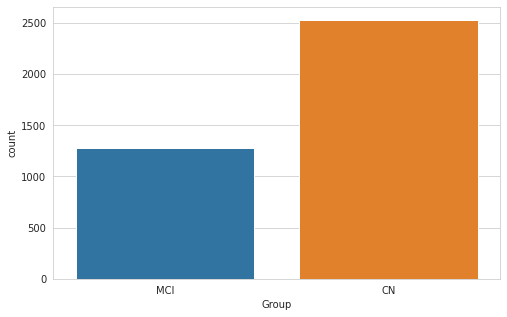

In [63]:
#see how many people have Alzheimer
#same person visits two or more time so only take the single visit data
sns.set_style("whitegrid")
ex_df = df
sns.countplot(x='Group', data=ex_df)

(15.3, 8676.221248)

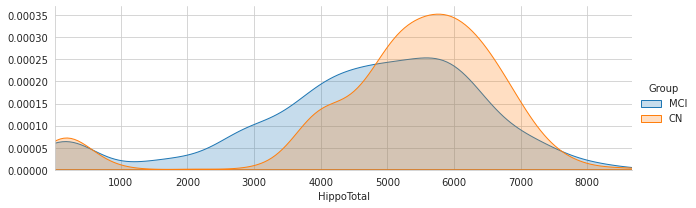

In [64]:
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'HippoTotal',shade= True)
facet.set(xlim=(0, df['HippoTotal'].max()))
facet.add_legend()
plt.xlim(15.30)

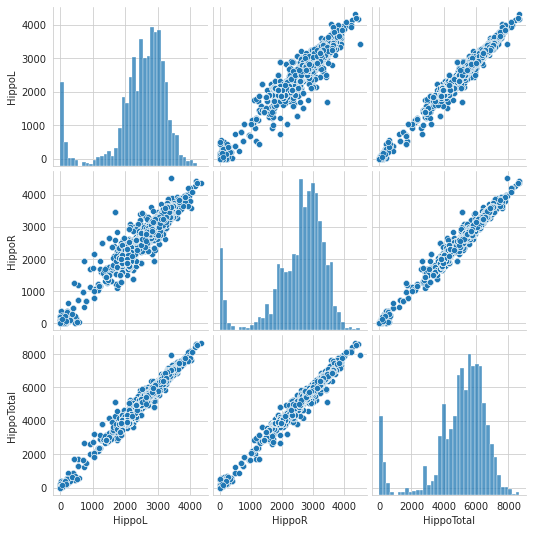

In [65]:
from pylab import rcParams
rcParams['figure.figsize'] = 8,5
cols = ['HippoL','HippoR','HippoTotal']
x=df.fillna('')
sns_plot = sns.pairplot(x[cols])

HippoL
HippoR
HippoTotal
Group
Best parameters set found on development set:
{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200}


Confusion Matrix:
[[735   9]
 [191 208]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.79      0.99      0.88       744
           1       0.96      0.52      0.68       399

    accuracy                           0.83      1143
   macro avg       0.88      0.75      0.78      1143
weighted avg       0.85      0.83      0.81      1143



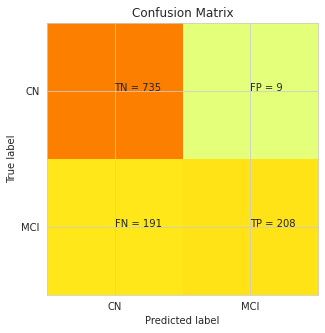

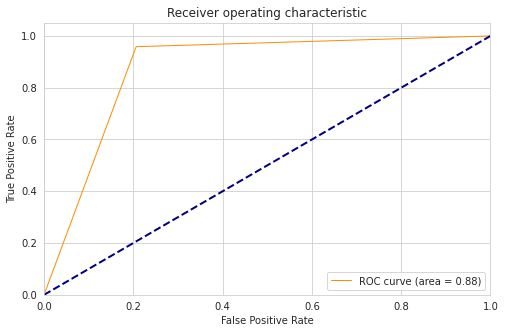


Acuuracy Of the Model:  0.8250218722659668 




In [66]:
# Encode columns into numeric
from sklearn.preprocessing import LabelEncoder
for column in df.columns:
    le = LabelEncoder()
    print(column)
    df[column] = le.fit_transform(df[column])

from sklearn.model_selection import train_test_split

feature_col_names = ['HippoL','HippoR','HippoTotal']
predicted_class_names = ['Group']

X = df[feature_col_names].values
y = df[predicted_class_names].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

from sklearn import metrics
def plot_confusion_metrix(y_test,model_test):
    cm = metrics.confusion_matrix(y_test, model_test)
    plt.figure(1)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['CN','MCI']
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

from sklearn.metrics import roc_curve, auc
def report_performance(model):

    model_test = model.predict(X_test)

    print("\n\nConfusion Matrix:")
    print("{0}".format(metrics.confusion_matrix(y_test, model_test)))
    print("\n\nClassification Report: ")
    print(metrics.classification_report(y_test, model_test))
    #cm = metrics.confusion_matrix(y_test, model_test)
    plot_confusion_metrix(y_test, model_test)

def roc_curves(model):
    predictions_test = model.predict(X_test)
    fpr, tpr, thresholds = roc_curve(predictions_test,y_test)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

total_models = ['GridSearchCV','SVC','DecisionTreeClassifier','XGBClassifier','LGBMClassifier',
                    'ExtraTreesClassifier','GradientBoostingClassifier','AdaBoostClassifier','KNeighborsClassifier',
                    'MLPClassifier','GaussianNB','LogisticRegression']
total_accuracy = {}
for i in total_models:
    total_accuracy[str(i)] = 0
def accuracy(model):
    pred = model.predict(X_test)
    accu = metrics.accuracy_score(y_test,pred)
    print("\nAcuuracy Of the Model: ",accu,"\n\n")
    total_accuracy[str((str(model).split('(')[0]))] = accu

from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier


rfc=RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [200],
    'max_features': ['auto'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid,scoring = 'roc_auc')
CV_rfc.fit(X_train, y_train.ravel())
print("Best parameters set found on development set:")
print(CV_rfc.best_params_)
report_performance(CV_rfc) 
roc_curves(CV_rfc)
accuracy(CV_rfc)




Confusion Matrix:
[[744   0]
 [399   0]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.65      1.00      0.79       744
           1       0.00      0.00      0.00       399

    accuracy                           0.65      1143
   macro avg       0.33      0.50      0.39      1143
weighted avg       0.42      0.65      0.51      1143



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


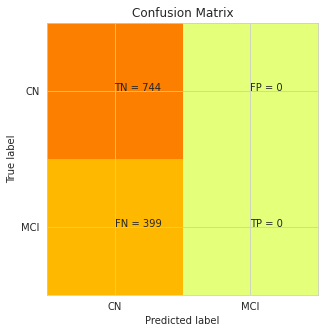

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


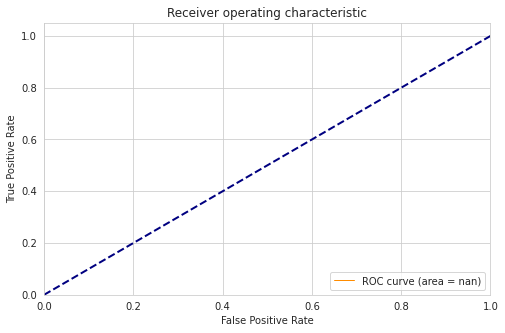


Acuuracy Of the Model:  0.6509186351706037 




In [67]:
svm = SVC(kernel="linear", C=0.1,random_state=0)
svm.fit(X_train, y_train.ravel())
report_performance(svm) 
roc_curves(svm)
accuracy(svm)



Confusion Matrix:
[[728  16]
 [273 126]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.73      0.98      0.83       744
           1       0.89      0.32      0.47       399

    accuracy                           0.75      1143
   macro avg       0.81      0.65      0.65      1143
weighted avg       0.78      0.75      0.71      1143



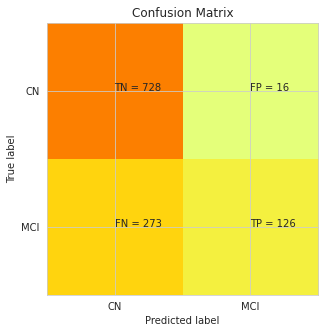

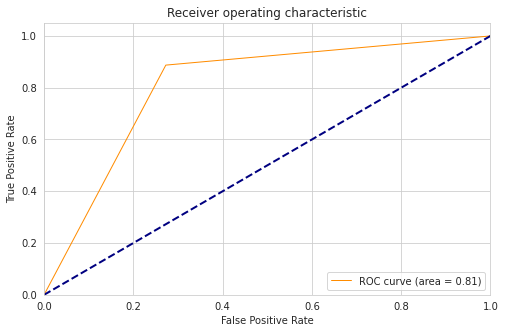


Acuuracy Of the Model:  0.7471566054243219 




In [68]:
clf_dtc = DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=0)
clf_dtc.fit(X_train, y_train.ravel())
report_performance(clf_dtc) 
roc_curves(clf_dtc)
accuracy(clf_dtc)



Confusion Matrix:
[[726  18]
 [184 215]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.98      0.88       744
           1       0.92      0.54      0.68       399

    accuracy                           0.82      1143
   macro avg       0.86      0.76      0.78      1143
weighted avg       0.84      0.82      0.81      1143



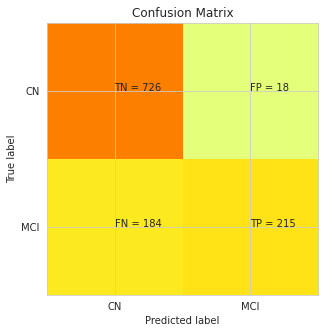

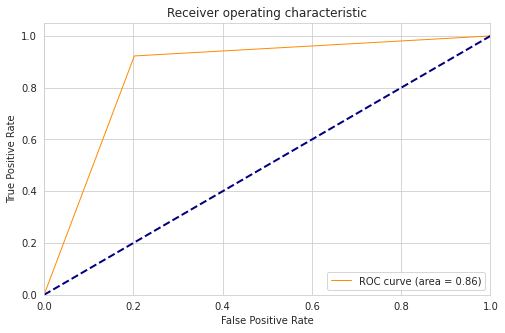


Acuuracy Of the Model:  0.8232720909886264 




In [69]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [1,2,3,4,5]
        }

clf_xgb = XGBClassifier(random_state=0)
clf_xgb.fit(X_train, y_train.ravel())
report_performance(clf_xgb) 
roc_curves(clf_xgb)
accuracy(clf_xgb)



Confusion Matrix:
[[728  16]
 [164 235]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.98      0.89       744
           1       0.94      0.59      0.72       399

    accuracy                           0.84      1143
   macro avg       0.88      0.78      0.81      1143
weighted avg       0.86      0.84      0.83      1143



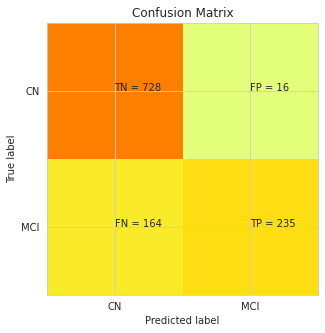

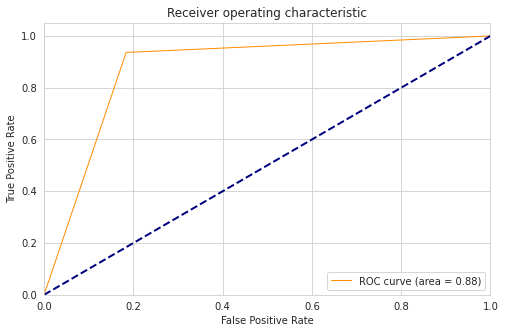


Acuuracy Of the Model:  0.84251968503937 




Confusion Matrix:
[[729  15]
 [ 92 307]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       744
           1       0.95      0.77      0.85       399

    accuracy                           0.91      1143
   macro avg       0.92      0.87      0.89      1143
weighted avg       0.91      0.91      0.90      1143



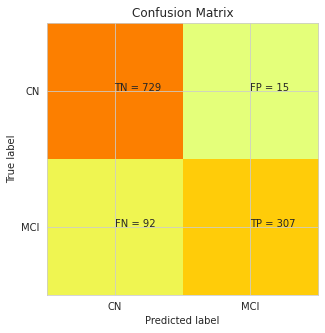

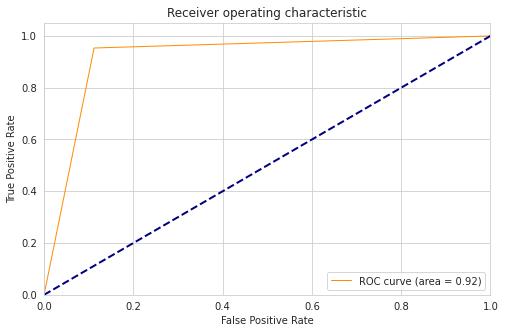


Acuuracy Of the Model:  0.9063867016622922 




In [70]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection

vote_est = [('etc',ensemble.ExtraTreesClassifier()),
            ('gb',GradientBoostingClassifier()),
            ('abc',AdaBoostClassifier()),
    ('rfc', ensemble.RandomForestClassifier(criterion='gini', max_depth=8, max_features='auto', n_estimators=200)),
    #('svc', svm.SVC(probability=True)),
    #('xgb', XGBClassifier()),
            ('lbgm',LGBMClassifier())
           ]


vote_hard = ensemble.VotingClassifier(estimators = vote_est , voting = 'hard')
vote_hard_cv = model_selection.cross_validate(vote_hard, X_train, y_train.ravel())
vote_hard.fit(X_train, y_train.ravel())
report_performance(vote_hard) 
roc_curves(vote_hard)
accuracy(vote_hard)
#pred = vote_hard.predict(X_test)
#accu = metrics.accuracy_score(y_test,pred)
#print("\nAcuuracy Of the Model: ",accu,"\n\n")

vote_soft = ensemble.VotingClassifier(estimators = vote_est , voting = 'soft')
vote_soft_cv = model_selection.cross_validate(vote_soft, X_train, y_train.ravel())
vote_soft.fit(X_train, y_train.ravel())
report_performance(vote_soft) 
roc_curves(vote_soft)
accuracy(vote_soft)
#pred = vote_soft.predict(X_test)
#accu = metrics.accuracy_score(y_test,pred)
#print("\nAcuuracy Of the Model: ",accu,"\n\n")


LGBMClassifier : 


Confusion Matrix:
[[700  44]
 [100 299]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       744
           1       0.87      0.75      0.81       399

    accuracy                           0.87      1143
   macro avg       0.87      0.85      0.86      1143
weighted avg       0.87      0.87      0.87      1143



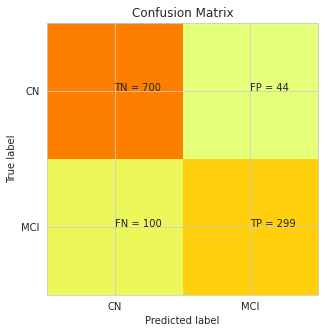

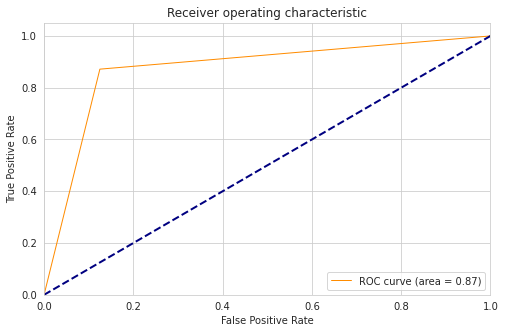


Acuuracy Of the Model:  0.8740157480314961 


ExtraTreesClassifier : 


Confusion Matrix:
[[727  17]
 [ 46 353]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       744
           1       0.95      0.88      0.92       399

    accuracy                           0.94      1143
   macro avg       0.95      0.93      0.94      1143
weighted avg       0.95      0.94      0.94      1143



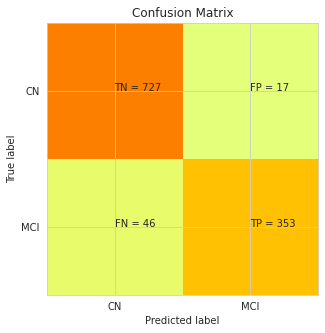

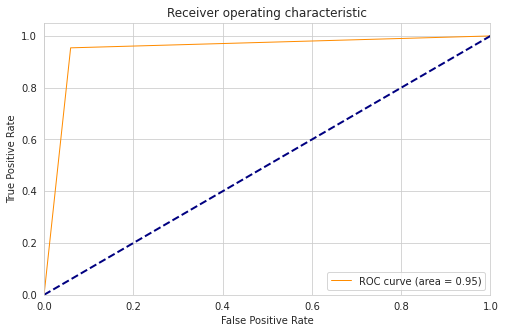


Acuuracy Of the Model:  0.9448818897637795 


GradientBoostingClassifier : 


Confusion Matrix:
[[727  17]
 [168 231]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.98      0.89       744
           1       0.93      0.58      0.71       399

    accuracy                           0.84      1143
   macro avg       0.87      0.78      0.80      1143
weighted avg       0.85      0.84      0.83      1143



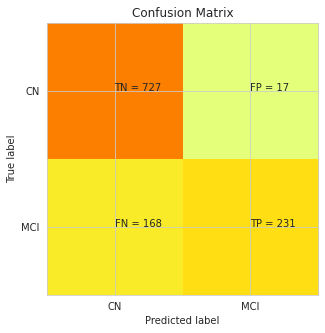

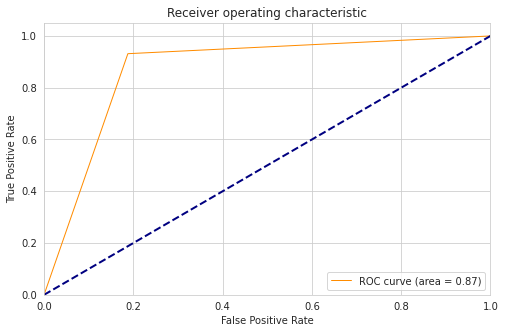


Acuuracy Of the Model:  0.8381452318460193 


AdaBoostClassifier : 


Confusion Matrix:
[[703  41]
 [247 152]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.74      0.94      0.83       744
           1       0.79      0.38      0.51       399

    accuracy                           0.75      1143
   macro avg       0.76      0.66      0.67      1143
weighted avg       0.76      0.75      0.72      1143



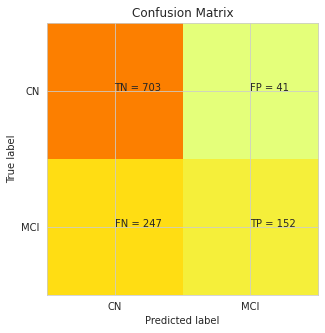

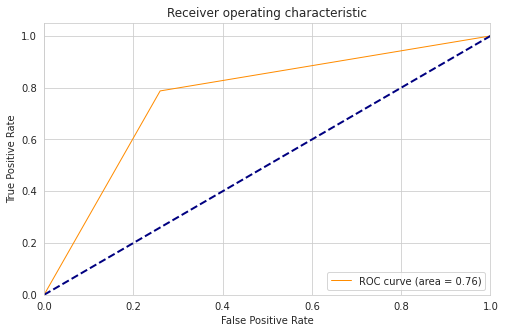


Acuuracy Of the Model:  0.7480314960629921 


KNeighborsClassifier : 


Confusion Matrix:
[[689  55]
 [126 273]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.93      0.88       744
           1       0.83      0.68      0.75       399

    accuracy                           0.84      1143
   macro avg       0.84      0.81      0.82      1143
weighted avg       0.84      0.84      0.84      1143



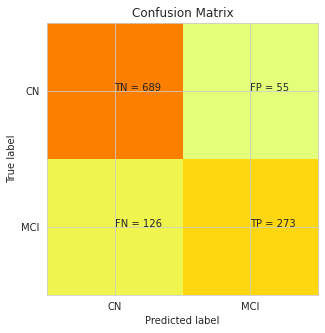

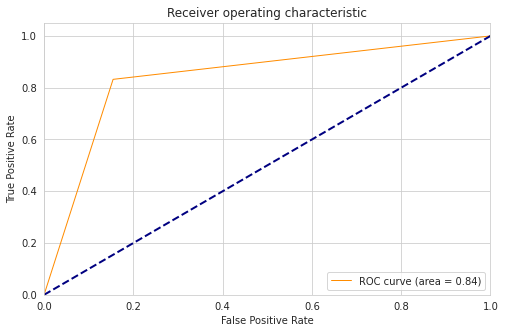


Acuuracy Of the Model:  0.8416447944007 


MLPClassifier : 


Confusion Matrix:
[[443 301]
 [177 222]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.71      0.60      0.65       744
           1       0.42      0.56      0.48       399

    accuracy                           0.58      1143
   macro avg       0.57      0.58      0.57      1143
weighted avg       0.61      0.58      0.59      1143



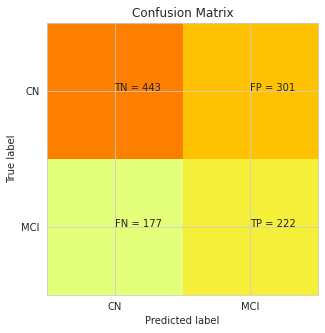

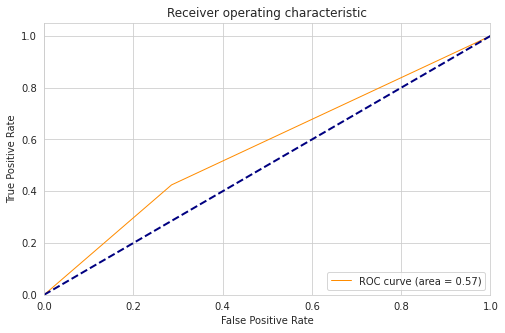


Acuuracy Of the Model:  0.5818022747156606 


GaussianNB : 


Confusion Matrix:
[[574 170]
 [226 173]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.72      0.77      0.74       744
           1       0.50      0.43      0.47       399

    accuracy                           0.65      1143
   macro avg       0.61      0.60      0.60      1143
weighted avg       0.64      0.65      0.65      1143



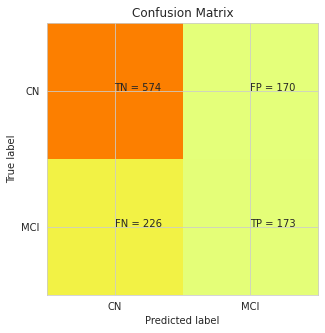

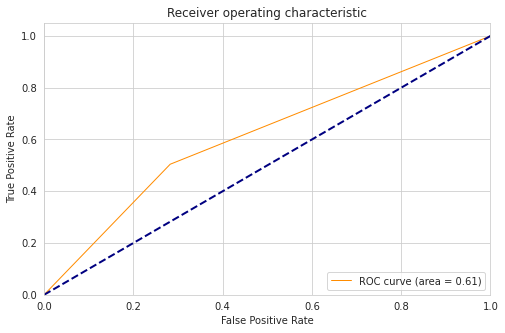


Acuuracy Of the Model:  0.6535433070866141 


LogisticRegression : 


Confusion Matrix:
[[737   7]
 [377  22]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.66      0.99      0.79       744
           1       0.76      0.06      0.10       399

    accuracy                           0.66      1143
   macro avg       0.71      0.52      0.45      1143
weighted avg       0.70      0.66      0.55      1143



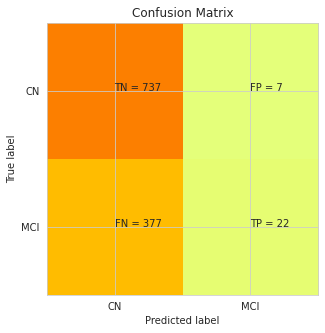

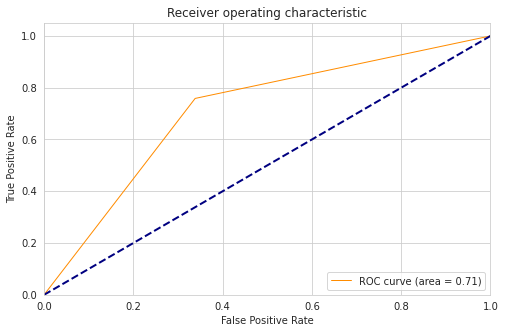


Acuuracy Of the Model:  0.6640419947506562 




In [71]:
clfs =[LGBMClassifier(),ExtraTreesClassifier(),GradientBoostingClassifier(),AdaBoostClassifier(),KNeighborsClassifier(),
          MLPClassifier(alpha=1),GaussianNB(),LogisticRegression()]

for model in clfs:
    print(str(model).split('(')[0],": ")
    model.fit(X_train,y_train.ravel())
    X = pd.DataFrame(X_train)
    report_performance(model)
    roc_curves(model)
    accuracy(model)

dict_values([0.8250218722659668, 0.6509186351706037, 0.7471566054243219, 0.8232720909886264, 0.8740157480314961, 0.9448818897637795, 0.8381452318460193, 0.7480314960629921, 0.8416447944007, 0.5818022747156606, 0.6535433070866141, 0.6640419947506562, 0.9063867016622922])


Text(0, 0.5, 'Accuracy')

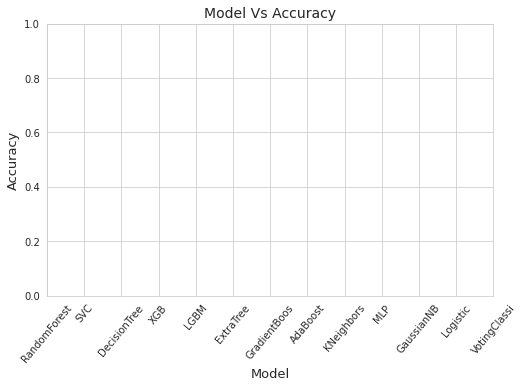

In [75]:
data = total_accuracy.values()
print(data)
labels = ['RandomForest','SVC','DecisionTree','XGB','LGBM',
                    'ExtraTree','GradientBoosting','AdaBoost','KNeighbors',
                    'MLP','GaussianNB','Logistic','VotingClassifier(Soft)']

#plt.plot([i for i, e in enumerate(data)], data, 'ro'); 
plt.xticks([i for i, e in enumerate(data)], [l[0:16] for l in labels])
plt.title("Model Vs Accuracy",fontsize = 14)
plt.xlabel('Model',fontsize = 13)
plt.xticks(rotation = 50)
plt.ylabel('Accuracy',fontsize = 13)